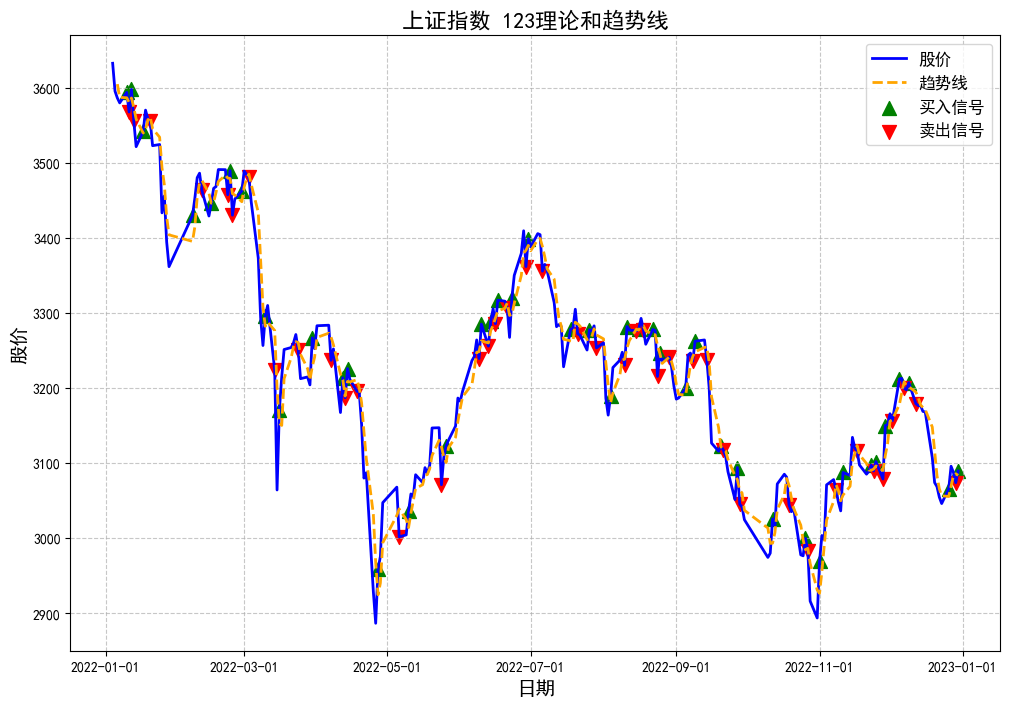

In [2]:
# 创建一个美化的图表
plt.figure(figsize=(12, 8))

# 支持中文
plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False

# 绘制股价曲线
plt.plot(df['Date'], df['close'], label='股价', linewidth=2, color='blue')

# 绘制趋势线
plt.plot(df['Date'], df['Trend'], label='趋势线', linestyle='--', linewidth=2, color='orange')

# 标记买卖信号
buy_signals = df[df['Signal'] == 1]
sell_signals = df[df['Signal'] == -1]
plt.scatter(buy_signals['Date'], buy_signals['close'], marker='^', color='g', label='买入信号', s=100)
plt.scatter(sell_signals['Date'], sell_signals['close'], marker='v', color='r', label='卖出信号', s=100)

# 添加网格
plt.grid(True, linestyle='--', alpha=0.7)

# 设置图表标题和标签
plt.title(f'上证指数 123理论和趋势线', fontsize=16)
plt.xlabel('日期', fontsize=14)
plt.ylabel('股价', fontsize=14)

# 调整x轴日期标签的格式
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# 显示图例
plt.legend(fontsize=12)

# 显示图表
plt.show()